In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\CSV files\insurance.csv")

In [3]:
df.head()

,age,affordibility,insurance
0,21,1,0
1,25,1,0
2,31,0,0
3,50,1,1
4,41,1,1


In [4]:
df.tail()

,age,affordibility,insurance
29,18,0,0
30,17,0,0
31,25,0,0
32,35,0,1
33,44,1,1


In [5]:
df.shape

(34, 3)

In [6]:
df.describe()

,age,affordibility,insurance
count,34.000000,34.000000,34.000000
mean,35.911765,0.558824,0.500000
std,13.369725,0.503995,0.507519
min,17.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,34.500000,1.000000,0.500000
75%,44.000000,1.000000,1.000000
max,61.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            34 non-null     int64
 1   affordibility  34 non-null     int64
 2   insurance      34 non-null     int64
dtypes: int64(3)
memory usage: 948.0 bytes


In [8]:
df.isnull().sum()

age              0
affordibility    0
insurance        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(5)

<function matplotlib.pyplot.show(close=None, block=None)>

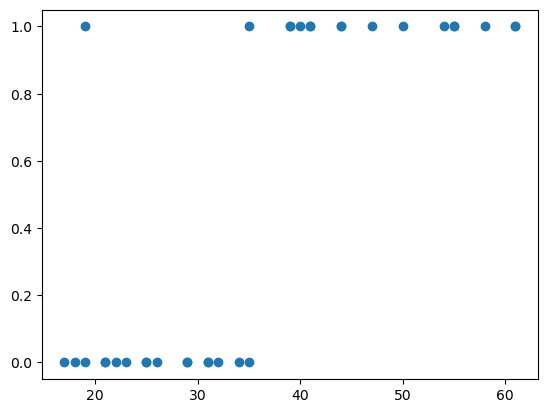

In [10]:
plt.scatter(df["age"],df.insurance)
plt.show

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [27]:
model.fit(df[["age"]],df.insurance)

LogisticRegression()

In [14]:
model.coef_

array([[0.27996302]])

In [15]:
model.intercept_

array([-9.67687081])

In [16]:
model.score(df[["age"]],df.insurance)

0.9411764705882353

In [17]:
df.insurance[:5]

0    0
1    0
2    0
3    1
4    1
Name: insurance, dtype: int64

In [18]:
df[["age"]][:5]

,age
0,21
1,25
2,31
3,50
4,41


In [19]:
predict = model.predict(df[["age"]])

In [20]:
predict

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [21]:
model.predict([[53]])

array([1])

In [22]:
df.head()

,age,affordibility,insurance
0,21,1,0
1,25,1,0
2,31,0,0
3,50,1,1
4,41,1,1


In [23]:
X = df[["age"]]
y = df.insurance

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_train.shape

(22, 1)

In [27]:
y_test.shape

(12,)

In [28]:
y_train.shape

(22,)

In [29]:
X_test.shape

(12, 1)

In [30]:
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
model.score(X_test,y_test)

0.8333333333333334

In [32]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [33]:
y_test

15    0
19    1
27    1
26    0
8     1
24    0
21    1
12    1
32    1
9     0
0     0
4     1
Name: insurance, dtype: int64

TP = TRUE_POSITIVE
A - 1
P - 1

FP = FALSE_POSITIVE
A - 0
P - 1

FN = TRUE_NEGATIVE
A - 1
P - 0

TN = TRUE_NEGATIVE
A - 0
P - 0

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5, 0],
       [2, 5]])

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

<Axes: >

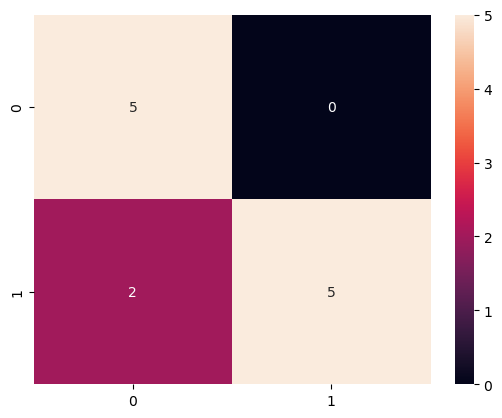

In [37]:
sns.heatmap(cm, annot=True)